# Gaussian Noise 

Add gaussian noise using numpy.random.normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 

In [554]:
import pandas as pd

In [555]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

In [556]:
# max height of normal
# Refer to: https://stats.stackexchange.com/questions/143631/height-of-a-normal-distribution-curve#:~:text=The%20height%20of%20the%20mode,formula%20for%20a%20normal%20density. 
height = 10
# standard deviation
sigma = 0.4 / height 
# mean 
mu = 10 
s = rng.normal(mu, sigma, 1000)

In [557]:
abs(mu - np.mean(s))

0.0008803535735051327

In [558]:
abs(sigma - np.std(s, ddof=1))

0.0003221899113925869

### Display the histogram of the samples, along with the probability density function:



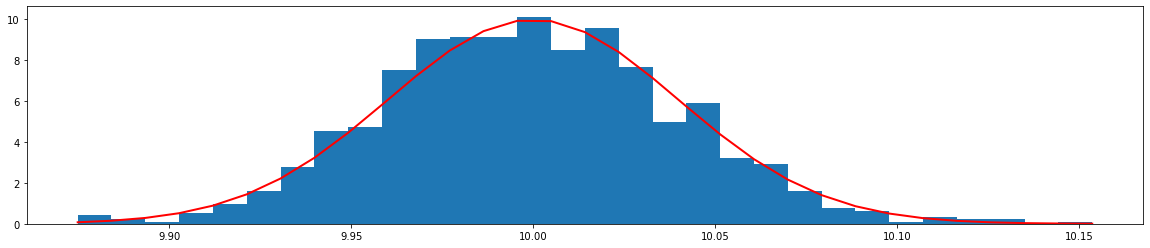

In [559]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# S1 No Volatility

In [560]:
file_names = []

df = pd.read_csv ("../datasets/s1_no_vol.csv", nrows=10)
df.drop(columns=df.columns[:1],axis=1, inplace=True)

In [561]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 4)

Populating the interactive namespace from numpy and matplotlib


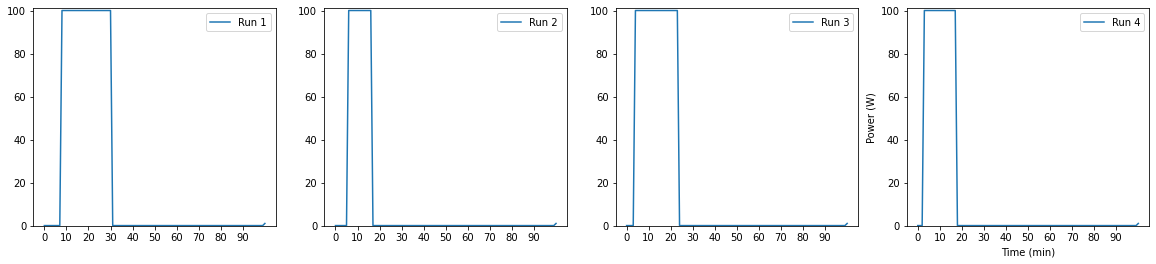

In [562]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(df.columns,df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 100+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
    

# S1 With Noise

In [568]:
num_cols = len(df.columns)

In [569]:
num_runs = len(df.index)

In [570]:
# max height of normal
height = 10
# standard deviation
sigma = 0.4 / height 
# mean 
mu = 1

In [571]:
for run in range(num_runs):
    noise = (rng.normal(mu, sigma, num_cols))
    df.iloc[run] = df.iloc[run] + noise

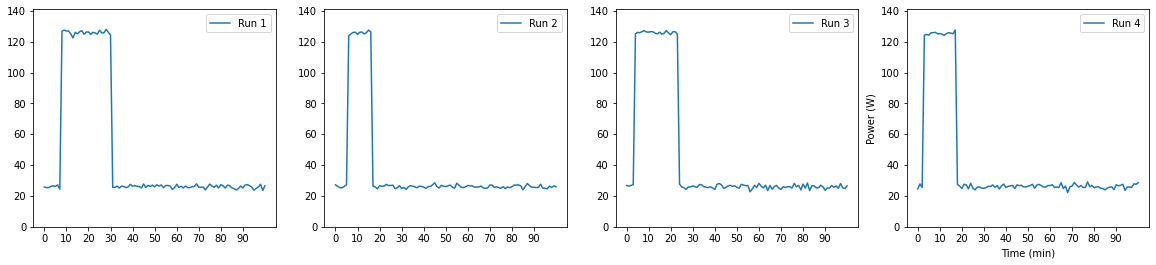

In [572]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(df.columns,df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 140+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# S1 With Volatility